# Twitter
-------------
1.	Login to twitter
2.	In same browser go to other tab --> type https://apps.twitter.com 
3.	Provide required information
4.	Get consumer key and consumer secret
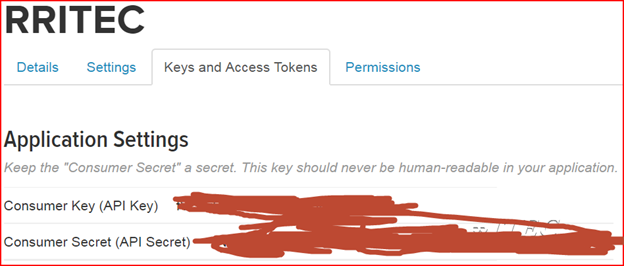


5.	Get access token key and access token  secret
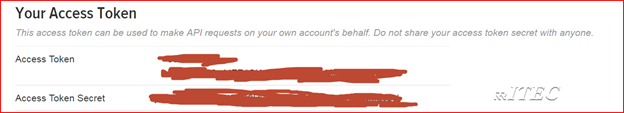
6. Twitter API
    - API: Application Programming Interace
    - Method of accessing data
7. Twitter APIs
    - Search API
    - Ads API
    - Streaming API
8. Let us use `Streaming API`
    - Real-time tweets
    - Filter endpoint
        - Keywords
        - User IDs
        - Locations
    - Sample endpoint
        - Random sample


## verify tweepy is instaled or not ?

In [14]:
!conda list tweepy

# packages in environment at C:\Users\ramreddymyla\Anaconda3:
#
# Name                    Version                   Build  Channel
tweepy                    3.8.0                      py_0    conda-forge


## if not installed, instal it by running below command in `anaconda prompt`

`conda install -c conda-forge tweepy`

## Exercise 1: Setting up `tweepy` authentication

In [15]:
from tweepy import OAuthHandler
from tweepy import API

access_token = "302080647-HiM8CDQ9wMZF4CKxy854ZkZ0OK16uuIUd0769QxE" 
access_token_secret = "6jZDDe1yT3Vxj76KCD9Uu6ird1wVG5yTQ2wy3QfqMdvoU"
consumer_key = "fVEzu9uCRODBGuLrUC1ReDO98"
consumer_secret = "NZ383UCqARoUvC4RyCrFfuv8r7YON1frbqHorLX7EqWtHc93lX"

# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

In [16]:
type(api)

tweepy.api.API

## Exercise 2: Collecting data on `keywords`
----------------------------
- `Home Work :` [read help document to know API response objects](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json.html)

### Create Stream Listener function

In [17]:
from tweepy.streaming import StreamListener
from tweepy import Stream
import json
import time
import sys

class SListener(StreamListener):
    def __init__(self, api = None, fprefix = 'streamer'):
        self.api = api or API()
        self.counter = 0
        self.fprefix = fprefix
        # file name of the stream data #example streamer_20190620082030.json
        self.output  = open('%s_%s.json' % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')), 'w')


    def on_data(self, data):
        if  'in_reply_to_status' in data:
            self.on_status(data)
        elif 'delete' in data:
            delete = json.loads(data)['delete']['status']
            if self.on_delete(delete['id'], delete['user_id']) is False:
                return False
        elif 'limit' in data:
            if self.on_limit(json.loads(data)['limit']['track']) is False:
                return False
        elif 'warning' in data:
            warning = json.loads(data)['warnings']
            print("WARNING: %s" % warning['message'])
            return


    def on_status(self, status):
        self.output.write(status)
        self.counter += 1
        if self.counter >= 20000:
            self.output.close()
            self.output  = open('%s_%s.json' % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')), 'w')
            self.counter = 0
        return


    def on_delete(self, status_id, user_id):
        print("Delete notice")
        return


    def on_limit(self, track):
        print("WARNING: Limitation notice received, tweets missed: %d" % track)
        return


    def on_error(self, status_code):
        print('Encountered error with status code:', status_code)
        return 


    def on_timeout(self):
        print("Timeout, sleeping for 60 seconds...")
        time.sleep(60)
        return 

In [18]:
# Set up words to track
keywords_to_track = ["#rstats","#python"]

In [19]:
# Instantiate the SListener object 
listen = SListener(api)

In [20]:
# Instantiate the Stream object
stream = Stream(auth, listen)

In [21]:
# Begin collecting data
stream.filter(track = keywords_to_track)
# observe some time and stop it. collecting data is never ending process.

KeyboardInterrupt: 

## Exercise 3: Loading and accessing tweets
---------------------

In [22]:
# Load JSON
import json
tweet_json = open('tweet-example.json', 'r').read()

# Convert from JSON to Python object
tweet = json.loads(tweet_json)

# Print tweet text
print(tweet['text'])

RT @ewenharrison: Excited to be on my way to talk about the @GlobalSurg 3 Cancer Study at @Sloan_Kettering. Thank you to Peter Kingham for…


In [23]:
print(tweet["created_at"])

Mon Jun 17 13:38:36 +0000 2019


In [24]:
print(tweet["source"])

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>


In [25]:
tweet["user"]["screen_name"]

'dnepo'

In [26]:
# Print tweet id
print(tweet['id'])

1140614726176653312


In [27]:
tweet["user"]["followers_count"] #  get followers count

1990

In [28]:
tweet["user"]["friends_count"] #  get friends count

1579

## Exercise 4: Accessing user data

In [29]:
# Print user handle
print(tweet['user']['screen_name'])

# Print user follower count
print(tweet['user']['followers_count'])

# Print user location
print(tweet['user']['location'])

# Print user description
print(tweet['user']['description'])

dnepo
1990
Birmingham, England
Research Fellow in Public Health & Surgery at @NIHR_GSU & @GlobalSurg with focus on access to acute care in LMICs. Committee @WMRC_UK.


## Exercise 5: Accessing retweet data

In [30]:
print(tweet['retweeted_status']['text'])

Excited to be on my way to talk about the @GlobalSurg 3 Cancer Study at @Sloan_Kettering. Thank you to Peter Kingha… https://t.co/WhNBS8zSQX


In [31]:
# Print the text of the tweet
print(tweet['retweeted_status']['text'])

Excited to be on my way to talk about the @GlobalSurg 3 Cancer Study at @Sloan_Kettering. Thank you to Peter Kingha… https://t.co/WhNBS8zSQX


In [32]:
# Print the text of the tweet
print(tweet['retweeted_status']['user']['screen_name'])

ewenharrison


In [33]:
tweet['retweeted_status']['extended_tweet']

{'full_text': 'Excited to be on my way to talk about the @GlobalSurg 3 Cancer Study at @Sloan_Kettering. Thank you to Peter Kingham for the invitation. Early results to share with collaborators shortly! #collaboration @NIHR_GSU #rstats https://t.co/8SThofeYie',
 'display_text_range': [0, 220],
 'entities': {'hashtags': [{'text': 'collaboration', 'indices': [188, 202]},
   {'text': 'rstats', 'indices': [213, 220]}],
  'urls': [],
  'user_mentions': [{'screen_name': 'GlobalSurg',
    'name': 'GlobalSurg',
    'id': 1656201205,
    'id_str': '1656201205',
    'indices': [42, 53]},
   {'screen_name': 'sloan_kettering',
    'name': 'Memorial Sloan Kettering Cancer Center',
    'id': 27295244,
    'id_str': '27295244',
    'indices': [72, 88]},
   {'screen_name': 'NIHR_GSU',
    'name': 'NIHR Global Surgery',
    'id': 1012291427529838592,
    'id_str': '1012291427529838592',
    'indices': [203, 212]}],
  'symbols': [],
  'media': [{'id': 1140569556416679941,
    'id_str': '1140569556416679

In [34]:
tweet['retweeted_status']['extended_tweet']["full_text"]

'Excited to be on my way to talk about the @GlobalSurg 3 Cancer Study at @Sloan_Kettering. Thank you to Peter Kingham for the invitation. Early results to share with collaborators shortly! #collaboration @NIHR_GSU #rstats https://t.co/8SThofeYie'

## Exercise 6: A tweet flattening function
--------------
- Create DateFrame with tweet data

In [35]:
def flatten_tweets(tweets_json):
    tweets = [] # empty list
    
    # Iterate through each tweet
    for tweet in tweets_json:
        if tweet == '':
            continue
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['extended_tweet-full_text'] = tweet_obj['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
    
            if 'extended_tweet' in tweet_obj['retweeted_status']:
                # Store the extended retweet text in 'retweeted_status-extended_tweet-full_text'
                tweet_obj['retweeted_status-extended_tweet-full_text'] = tweet_obj['retweeted_status']['extended_tweet']['full_text']
                
        if 'quoted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['quoted_status-user-screen_name'] = tweet_obj['quoted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['quoted_status-text'] = tweet_obj['quoted_status']['text']
    
            if 'extended_tweet' in tweet_obj['quoted_status']:
                # Store the extended retweet text in 'retweeted_status-extended_tweet-full_text'
                tweet_obj['quoted_status-extended_tweet-full_text'] = tweet_obj['quoted_status']['extended_tweet']['full_text']
        tweets.append(tweet_obj)
    return tweets

### loading above stream data into dataframe

In [36]:
with open('streamer_20190911-095939.json', 'r') as fh:
    tweets_json = fh.read().split("\n")

In [37]:
len(tweets_json)

35

In [38]:
tweets_json[32]

'{"created_at":"Wed Sep 11 04:41:10 +0000 2019","id":1171644829081755648,"id_str":"1171644829081755648","text":"RT @ITSolut62078624: You must use the Oledbor Odbcprovider for SQL Server 6.5 and earlier.\\n\\n#ado.net #java #csharp #php #Python #C++ #OOP #\\u2026","source":"\\u003ca href=\\"https:\\/\\/mobile.twitter.com\\" rel=\\"nofollow\\"\\u003eTwitter Web App\\u003c\\/a\\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":562027308,"id_str":"562027308","name":"Marie M","screen_name":"lifedrama26","location":"Texas","url":null,"description":"My perfect day would be sitting outside on a nice day or on my patio on a mild rainy day reading a good book with my baby boy and no drama or worries in my life","translator_type":"none","protected":false,"verified":false,"followers_count":1543,"friends_count":2423,"listed_count":11,"favourites_count":12597,"st

In [39]:
# Flatten the tweets and store them
flat_tweets = flatten_tweets(tweets_json)

In [40]:
len(flat_tweets)

17

In [41]:
type(flat_tweets)

list

In [42]:
flat_tweets[16]

{'created_at': 'Wed Sep 11 04:41:10 +0000 2019',
 'id': 1171644829081755648,
 'id_str': '1171644829081755648',
 'text': 'RT @ITSolut62078624: You must use the Oledbor Odbcprovider for SQL Server 6.5 and earlier.\n\n#ado.net #java #csharp #php #Python #C++ #OOP #…',
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 562027308,
  'id_str': '562027308',
  'name': 'Marie M',
  'screen_name': 'lifedrama26',
  'location': 'Texas',
  'url': None,
  'description': 'My perfect day would be sitting outside on a nice day or on my patio on a mild rainy day reading a good book with my baby boy and no drama or worries in my life',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 1543,
  'friends_count': 2423,
  'listed_cou

In [43]:
# Convert to DataFrame
import pandas as pd
ds_tweets = pd.DataFrame(flat_tweets)

In [44]:
ds_tweets.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,...,retweeted_status,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name
12,None,None,Wed Sep 11 04:38:01 +0000 2019,NaN,"{'hashtags': [{'text': 'Python', 'indices': [2...","{'full_text': 'RT Ronald_vanLoon ""12 #Python R...","RT Ronald_vanLoon ""12 #Python Resources for #D...",0,False,low,...,NaN,NaN,NaN,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...","RT Ronald_vanLoon ""12 #Python Resources for #D...",1568176681040,True,"{'id': 1536562052, 'id_str': '1536562052', 'na...",YwanVanLoon
13,None,None,Wed Sep 11 04:38:01 +0000 2019,NaN,"{'hashtags': [{'text': 'Python', 'indices': [2...",NaN,NaN,0,False,low,...,{'created_at': 'Wed Sep 04 19:59:48 +0000 2019...,"In #Python, all() returns True if all elements...","In #Python, all() returns True if all elements...",python_awesome,"<a href=""http://twitter.com/download/android"" ...","RT @python_awesome: In #Python, all() returns ...",1568176681236,False,"{'id': 938136144, 'id_str': '938136144', 'name...",cmkishores
14,None,None,Wed Sep 11 04:39:01 +0000 2019,NaN,"{'hashtags': [{'text': 'rstats', 'indices': [1...",NaN,NaN,0,False,low,...,{'created_at': 'Wed Sep 11 02:09:03 +0000 2019...,"🌈 Fab use of {ggforce} for annotation!\n""Built...","🌈 Fab use of {ggforce} for annotation!\n""Built...",dataandme,"<a href=""http://twitter.com/download/android"" ...",RT @dataandme: 🌈 Fab use of {ggforce} for anno...,1568176741086,False,"{'id': 2577407108, 'id_str': '2577407108', 'na...",MirHenglin
15,None,None,Wed Sep 11 04:40:03 +0000 2019,NaN,"{'hashtags': [{'text': 'python', 'indices': [1...",NaN,NaN,0,False,low,...,{'created_at': 'Wed Sep 11 04:34:44 +0000 2019...,AutoCAD &amp; AutoCAD LT All-in-One Desk Refer...,AutoCAD &amp; AutoCAD LT All-in-One Desk Refer...,ProgrammerBooks,"<a href=""https://twitter.com/cool_golang"" rel=...",RT @ProgrammerBooks: AutoCAD &amp; AutoCAD LT ...,1568176803157,False,"{'id': 735555667965136897, 'id_str': '73555566...",cool_golang
16,None,None,Wed Sep 11 04:41:10 +0000 2019,NaN,"{'hashtags': [{'text': 'ado', 'indices': [92, ...",NaN,NaN,0,False,low,...,{'created_at': 'Wed Sep 11 04:38:00 +0000 2019...,You must use the Oledbor Odbcprovider for SQL ...,You must use the Oledbor Odbcprovider for SQL ...,ITSolut62078624,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @ITSolut62078624: You must use the Oledbor ...,1568176870018,False,"{'id': 562027308, 'id_str': '562027308', 'name...",lifedrama26


In [45]:
len(ds_tweets)

17

## Exercise 7: count words
--------------------
- Comparing `#python` and `#rstats`

In [46]:
import numpy as np
# Find mentions of #python in 'text'
python = ds_tweets['text'].str.contains('#python', case = False)

In [47]:
python.head()

0    False
1     True
2     True
3     True
4     True
Name: text, dtype: bool

In [48]:
sum(python)

14

In [49]:
# Print proportion of tweets mentioning #python
print("Proportion of #python tweets:", np.sum(python) / ds_tweets.shape[0])

Proportion of #python tweets: 0.8235294117647058


In [50]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    #contains_column |= data['quoted_status-text'].str.contains(word, case = False) 
    #contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False) 
    contains_column |= data['retweeted_status-text'].str.contains(word, case = False) 
    contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False)
    return contains_column

In [51]:
# Find mentions of #python in all text fields
python = check_word_in_tweet('#python', ds_tweets)

# Find mentions of #rstats in all text fields
rstats = check_word_in_tweet('#rstats', ds_tweets)

# Print proportion of tweets mentioning #python
print("Proportion of #python tweets:", np.sum(python) / ds_tweets.shape[0])

# Print proportion of tweets mentioning #rstats
print("Proportion of #rstats tweets:", np.sum(rstats) / ds_tweets.shape[0])

Proportion of #python tweets: 0.8823529411764706
Proportion of #rstats tweets: 0.058823529411764705


In [52]:
sum(python)

15

In [53]:
sum(rstats)

1

In [54]:
python

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16     True
Name: text, dtype: bool

In [55]:
rstats

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
Name: text, dtype: bool

## Exercise 8: Time Series Analysis
------------------

### Creating time series data frame

In [78]:
import pandas as pd
ds_tweets = pd.read_csv("datascience_tags.csv")

In [79]:
# Print created_at to see the original format of datetime in Twitter data
print(ds_tweets['created_at'].head())



0    Thu Mar 01 07:02:41 +0000 2018
1    Thu Mar 01 07:57:08 +0000 2018
2    Thu Mar 01 08:09:02 +0000 2018
3    Thu Mar 01 09:22:21 +0000 2018
4    Thu Mar 01 12:04:04 +0000 2018
Name: created_at, dtype: object


In [80]:
ds_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 43 columns):
contributors                                 0 non-null float64
coordinates                                  3 non-null object
created_at                                   1169 non-null object
display_text_range                           225 non-null object
entities                                     1169 non-null object
extended_entities                            163 non-null object
extended_tweet                               163 non-null object
extended_tweet-full_text                     163 non-null object
favorite_count                               1169 non-null int64
favorited                                    1169 non-null bool
filter_level                                 1169 non-null object
geo                                          3 non-null object
id                                           1169 non-null int64
id_str                                       1169 n

In [81]:
# Convert the created_at column to np.datetime object
ds_tweets['created_at'] = pd.to_datetime(ds_tweets['created_at'])

In [83]:
# Set the index of ds_tweets to created_at
ds_tweets = ds_tweets.set_index('created_at')

In [85]:
ds_tweets.head()

,contributors,coordinates,display_text_range,entities,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,...,retweeted_status,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name
created_at,,,,,,,,,,,,,,,,,,,,,
2018-03-01 07:02:41+00:00,NaN,NaN,NaN,"{'hashtags': [{'text': 'python', 'indices': [8...",NaN,NaN,NaN,0,False,low,...,{'created_at': 'Thu Mar 01 06:47:35 +0000 2018...,NaN,Learning Penetration Testing With Python http...,pythonbot_,"<a href=""https://todo.mushfiqweb.com"" rel=""nof...",RT @pythonbot_: Learning Penetration Testing W...,1519887761662,False,"{'id': 67016746, 'id_str': '67016746', 'name':...",mushfiqweb
2018-03-01 07:57:08+00:00,NaN,NaN,NaN,"{'hashtags': [{'text': 'Software', 'indices': ...",NaN,NaN,NaN,0,False,low,...,{'created_at': 'Thu Mar 01 07:54:04 +0000 2018...,NaN,Is Language Agnosticism the Future of #Softwar...,I_m_ranjeet,"<a href=""https://www.botlibre.com"" rel=""nofoll...",RT @I_m_ranjeet: Is Language Agnosticism the F...,1519891028660,False,"{'id': 962595301109518336, 'id_str': '96259530...",Dw_Develops
2018-03-01 08:09:02+00:00,NaN,NaN,NaN,"{'hashtags': [{'text': 'python', 'indices': [0...",NaN,"{'full_text': ""#python goes to #school for #be...",#python goes to #school for #beginner #scienti...,0,False,low,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#python goes to #school for #beginner #scienti...,1519891742657,True,"{'id': 946400503029678080, 'id_str': '94640050...",pinyosminyos
2018-03-01 09:22:21+00:00,NaN,NaN,"[0, 115]","{'hashtags': [{'text': 'data', 'indices': [66,...","{'media': [{'id': 969140774720847873, 'id_str'...",NaN,NaN,0,False,low,...,NaN,NaN,NaN,NaN,"<a href=""https://www.nytimes.com/"" rel=""nofoll...",Easy way to set Oracle Active Dataguard\r\nâ˜ž...,1519896141665,False,"{'id': 915436926500462592, 'id_str': '91543692...",datascience_new
2018-03-01 12:04:04+00:00,NaN,NaN,"[0, 100]","{'hashtags': [{'text': 'python', 'indices': [4...","{'media': [{'id': 969181471796731904, 'id_str'...",NaN,NaN,0,False,low,...,NaN,NaN,NaN,NaN,"<a href=""https://www.nytimes.com/"" rel=""nofoll...",Python 3 for Beginners\r\nâ˜ž https://t.co/va5...,1519905844657,False,"{'id': 912955536823410689, 'id_str': '91295553...",PythonCs


### Generating mean frequency

In [86]:
# Create a python column
ds_tweets['python'] = check_word_in_tweet('#python', ds_tweets)

# Create an rstats column
ds_tweets['rstats'] = check_word_in_tweet('#rstats', ds_tweets)

### Plotting mean frequency

In [87]:
# Average of python column by day
mean_python = ds_tweets['python'].resample('1 d').mean()

# Average of rstats column by day
mean_rstats = ds_tweets['rstats'].resample('1 d').mean()


In [88]:
mean_python.head()

created_at
2018-03-01 00:00:00+00:00    0.578947
2018-03-02 00:00:00+00:00    0.641026
2018-03-03 00:00:00+00:00    0.658537
2018-03-04 00:00:00+00:00    0.527778
2018-03-05 00:00:00+00:00    0.600000
Freq: D, Name: python, dtype: float64

In [89]:
mean_rstats.head()

created_at
2018-03-01 00:00:00+00:00    0.394737
2018-03-02 00:00:00+00:00    0.333333
2018-03-03 00:00:00+00:00    0.317073
2018-03-04 00:00:00+00:00    0.333333
2018-03-05 00:00:00+00:00    0.400000
Freq: D, Name: rstats, dtype: float64

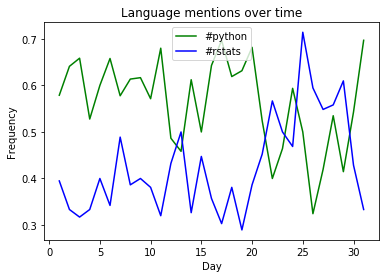

In [57]:
import matplotlib.pyplot as plt

# Plot mean python/rstats by day
plt.plot(mean_python.index.day, mean_python, color = 'green')
plt.plot(mean_rstats.index.day, mean_rstats, color = 'blue')

# Add labels and show
plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('Language mentions over time')
plt.legend(('#python', '#rstats'))
plt.show()

## Exercise 9: Sentiment Analysis


1. Understanding sentiment analysis `Method` needs 
    - Counting positive/negative words in the document
    - Assessing positivity/negativity of the whole document
2. `Use Cases: `
    - Analyzing reactions to a company, product, politician, or policy
3. `Sentiment analysis tools`
    - `VADER` SentimentIntensityAnalyzer()
    - Part of Natural Language Toolkit (nltk)
    - Good for short texts like tweets
    - Measures sentiment of particular words (e.g. angry, happy)
    - Also considers sentiment of emoji (😡,😄,👍,👎) and capitalization (Nice vs NICE)  
    

### Loading `VADER` and understanding output

`If you are running first time,Please uncomment and run below code`

In [47]:
import nltk
#nltk.download('vader_lexicon')

ModuleNotFoundError: No module named 'nltk'

In [46]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


ModuleNotFoundError: No module named 'nltk'

In [63]:
tweet1 = 'RT @jeffrey_heer: Thanks for inviting me, and thanks for the lovely visualization of the talk! ...'
print(sid.polarity_scores(tweet1))

{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.9041}


In [64]:
tweet2 = 'i am having problems with google play music'
print(sid.polarity_scores(tweet2))

{'neg': 0.267, 'neu': 0.495, 'pos': 0.238, 'compound': -0.0772}


In [45]:
# Generate sentiment scores
sentiment_scores = ds_tweets['text'].apply(sid.polarity_scores)

NameError: name 'sid' is not defined

In [66]:
sentiment_scores.head()

created_at
2018-03-01 07:02:41+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2018-03-01 07:57:08+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2018-03-01 08:09:02+00:00    {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...
2018-03-01 09:22:21+00:00    {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...
2018-03-01 12:04:04+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, dtype: object

### Calculating sentiment scores

In [67]:
sentiment = sentiment_scores.apply(lambda x: x['compound'])

In [68]:
# Print out the text of a positive tweet
print(ds_tweets[sentiment > 0.6]['text'].values[0])

#python goes to #school for #beginner #scientist and #engineer. It's so easy to find solution for #equation in formâ€¦ https://t.co/JM8jGllwxk


In [69]:
# Print out the text of a negative tweet
print(ds_tweets[sentiment < -0.6]['text'].values[0])

PythonWeekly: one-pixel-attack-keras - Keras reimplementation of "One pixel attack for fooling deep neural networksâ€¦ https://t.co/LYcIh17Gnr


In [70]:
# Generate average sentiment scores for #python
sentiment_py = sentiment[ check_word_in_tweet('#python', ds_tweets) ].resample('1 d').mean()


In [71]:
sentiment_py.head()

created_at
2018-03-01 00:00:00+00:00    0.133145
2018-03-02 00:00:00+00:00    0.140824
2018-03-03 00:00:00+00:00    0.131807
2018-03-04 00:00:00+00:00    0.055389
2018-03-05 00:00:00+00:00    0.091374
Freq: D, Name: text, dtype: float64

In [72]:

# Generate average sentiment scores for #rstats
sentiment_r = sentiment[ check_word_in_tweet('#rstats', ds_tweets) ].resample('1 d').mean()

In [73]:
sentiment_r.head()

created_at
2018-03-01 00:00:00+00:00    0.167967
2018-03-02 00:00:00+00:00    0.276308
2018-03-03 00:00:00+00:00    0.151369
2018-03-04 00:00:00+00:00    0.257567
2018-03-05 00:00:00+00:00    0.090756
Freq: D, Name: text, dtype: float64

In [74]:
# Plotting sentiment scores

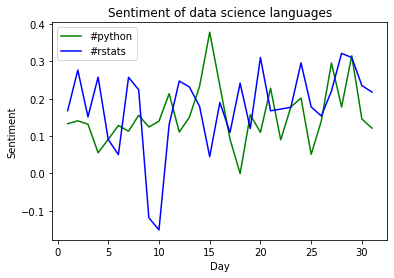

In [75]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot average #python sentiment per day
plt.plot(sentiment_py.index.day, sentiment_py, color = 'green')

# Plot average #rstats sentiment per day
plt.plot(sentiment_r.index.day, sentiment_r, color = 'blue')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of data science languages')
plt.legend(('#python', '#rstats'))
plt.show()